In [1]:
import collections
import math
import pandas as pd
import matplotlib.pyplot as plt
print 'Pandas Version ' + pd.__version__

Pandas Version 0.20.2


In [2]:
# Some useful functions

def getLength(string):
    return len(string)

def getNumLabels(string):
    return len(string.split('.'))

def getEntropy(string):
    p, lns = collections.Counter(string), float(len(string))
    return -sum( count/lns * math.log(count/lns, 2) for count in p.values())

# Let's try to extract the domain name portion of each url
def getDomainPart(url):
    # Strip out first part of url
    url = url.replace("https://","").replace("http://","").replace("www.","")
    # Find the first occurence of '/'
    if url.find('/') > 0:
        url = url[0:url.find('/')]
    return url.lower()

def misplacedBrand(domain, brandlist):
    # Assuming everything is passed on lowercase
    
    # Loop through the brands
    for b in brandlist:
        # Check to see if brand in domain
        if (b in domain):
            # Where does the brand appear?
            # Find the rightmost '.'
            dotPos = domain.rfind('.')
            # Get the length of the brand name
            bLen = len(b)
            # Get assumed start index of brand
            startIndex = dotPos - bLen
            # What is the contents of the assumed location?
            assumedLoc = domain[startIndex:dotPos]
            # Check to see if brand name in assumed location
            # NOTE: might be in expected location but could have other leading chars
            # so make sure char before is a '.' or start of domain
            # for example w3google.com or www.w3google.com
            if (assumedLoc == b and (startIndex == 0 or domain[startIndex-1] == '.')):
                # As expected
                return 0
            else:
                # Misplaced not in expected location or has other leading chars
                return 1
            
    # No brand name in domain
    return 0
            
            

In [3]:
# Some well known brand names
brands = ['microsoft','google','apple','yahoo','paypal','ebay','amazon', 'dropbox','facebook','wordpress','instagram','pintrest',]


In [4]:
# Read the raw CSV file into a dataframe
df = pd.read_csv('data/verified_online.csv', usecols=['url', 'submission_time', 'verified'],encoding='utf-8')
# Look at the top of the dataframe
df.head(10)

,url,submission_time,verified
0,https://matbea.org,2019-02-16T14:08:09+00:00,yes
1,https://bit-exchanger.ru,2019-02-16T14:08:04+00:00,yes
2,https://bit-exchanger.ru/,2019-02-16T14:07:43+00:00,yes
3,http://bit-exchanger.ru,2019-02-16T14:07:42+00:00,yes
4,http://matbea.org/,2019-02-16T14:07:38+00:00,yes
5,https://matbea.org/,2019-02-16T14:07:27+00:00,yes
6,http://matbea.org,2019-02-16T14:07:26+00:00,yes
7,https://www.robwebclub.com/digital-marketing.php,2019-02-16T11:36:55+00:00,yes
8,https://bank24.top/b/cdt6?order_id=13730901&am...,2019-02-16T11:26:33+00:00,yes
9,http://spsistem.ru/authorization,2019-02-16T11:19:21+00:00,yes


In [5]:
# Add the domain part of the url to the dataframe
df['domain'] = [getDomainPart(url) for url in df['url']]

# Add the domain entropy
df['domain_entropy'] = [getEntropy(url) for url in df['domain']]

# Add the domain length
df['domain_len'] = [getLength(url) for url in df['domain']]

# Add the domain number of labels
df['num_labels'] = [getNumLabels(url) for url in df['domain']]

# Add the url entropy
df['url_entropy'] = [getEntropy(url) for url in df['url']]

# Add the url len
df['url_len'] = [getLength(url) for url in df['url']]

# Add misplaced brand name flag
df['misplaced_brand'] = [misplacedBrand(getDomainPart(url), brands) for url in df['url']]

# Let's see what we have
df.tail(400)

,url,submission_time,verified,domain,domain_entropy,domain_len,num_labels,url_entropy,url_len,misplaced_brand
9791,http://www.incubadorasavicola.cl/cha/,2016-04-10T06:55:13+00:00,yes,incubadorasavicola.cl,3.499228,21,2,4.010412,37,0
9792,http://slupt.upt.ro/images/stories/POJEJENA/up...,2016-04-09T18:50:49+00:00,yes,slupt.upt.ro,2.918296,12,3,4.258367,59,0
9793,http://tvr-immobilien.de/wp-includes/wp-app.php,2016-04-09T15:05:19+00:00,yes,tvr-immobilien.de,3.572469,17,2,4.194671,47,0
9794,http://sadervoyages.intnet.mu/bomtradebox.com/...,2016-04-09T13:03:03+00:00,yes,sadervoyages.intnet.mu,3.788755,22,3,4.202828,63,0
9795,http://www.incubadorasavicola.cl/cha/document....,2016-04-09T07:57:44+00:00,yes,incubadorasavicola.cl,3.499228,21,2,4.183982,50,0
9796,http://herdax.somee.com/DUPDATEZ.html,2016-04-09T07:53:03+00:00,yes,herdax.somee.com,3.327820,16,3,4.330282,37,0
9797,http://incubadorasavicola.cl/cha/pvalidate.html,2016-04-08T22:02:16+00:00,yes,incubadorasavicola.cl,3.499228,21,2,4.040520,47,0
9798,http://www.sagam.sn/images/mailerhome.php,2016-04-08T16:47:13+00:00,yes,sagam.sn,2.500000,8,2,3.930007,41,0
9799,http://www.bonasecco.com.br/wp-admin/user/PURC...,2016-04-08T05:12:56+00:00,yes,bonasecco.com.br,3.155639,16,3,4.976076,69,0
9800,http://appwefacebooe9.webcindario.com/,2016-04-07T23:19:56+00:00,yes,appwefacebooe9.webcindario.com,3.723231,30,3,4.063203,38,0


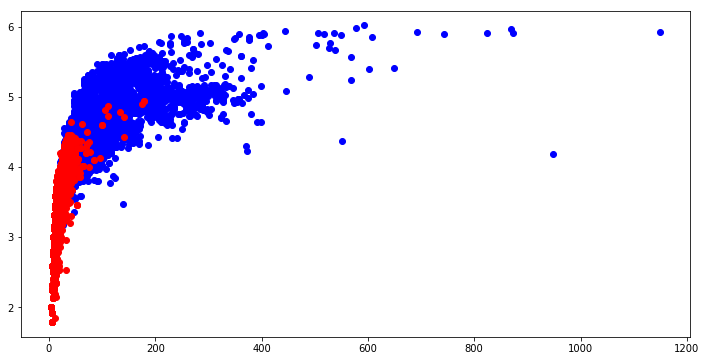

In [6]:
# Let's plot some stuff to see where we are
# We will plot length and entropy for the full url and domain parts
plt.figure(figsize=(12,6))
plt.plot(df['url_len'], df['url_entropy'], 'o', color='blue')
plt.plot(df['domain_len'], df['domain_entropy'], 'o', color='red')
plt.show()

# What are the most common words in the data set?
All of the data we are looking at thus far are verified phishing urls. 

In [7]:
# Some common terms that we might find in many URLs
whitelist =['com','php','html','net','css','xml','htm','www','aspx','amp']

# Create a python dictionary to store our phish words and counts
hash_map = {}

# Manually iterate through each URL in the Phishtank dataframe
for index, row in df.iterrows():
    # Change https urls to http
    line = row['url'].replace("https://","http://")
    # Replace http:// and common word separators with a '.'
    # / = ; : - _ & ?
    line = line.replace("http://","").replace("/",".").replace("=",".").replace(";",".").replace(":",".").replace("-",".").replace("_",".").replace("&",".").replace("?",".")
    # All the common sepearators should now be '.' so we can split the url string
    # based on '.' This will give us a list of words
    tokens = line.split(".")
    # For each word in our list of words (tokens)
    for word in tokens:
        # If num chars > 2
        if (len(word)>2) and (word not in whitelist):
            # Check to see if we already have the word in our dictionary hashmap
            if word in hash_map:
                # Word already exists so increment count
                hash_map[word] = hash_map[word] + 1
            else:
                # Word does not already exist, so make an entry and set count to 1
                hash_map[word] = 1

In [8]:
# Sort the dictionary by value (decending) and display entry and count
for key, value in sorted(hash_map.iteritems(), key=lambda (k,v): (v,k), reverse=True):
    print "%s: %s" % (key, value)

login: 979
index: 860
fid: 748
google: 552
includes: 501
rand: 438
org: 427
email: 421
1774256418: 420
content: 419
sites: 377
alibaba: 358
admin: 353
images: 311
view: 302
1252899642: 299
fav: 271
13InboxLight: 248
wixsite: 246
site: 242
personal: 239
file: 222
mysite: 211
update: 209
home: 197
cmd: 192
sharepoint: 182
secure: 179
mail: 178
myaccount: 173
auth: 166
customer: 165
plugins: 155
websc: 154
aspxn: 152
signin: 145
drive: 143
country: 133
themes: 131
13InboxLightaspxn: 131
blog: 127
log: 125
info: 122
account: 122
userid: 121
online: 118
Login: 118
layouts: 115
free: 115
service: 111
inc: 109
dropbox: 109
locale: 108
profile: 105
dhl: 102
tracelog: 100
yahoo: 97
blogspot: 97
000webhostapp: 96
web: 95
office: 94
index2: 92
config: 92
center: 92
manager: 89
resolution: 87
pdf: 87
Documents: 85
verification: 84
uploads: 84
stcroixlofts: 84
top: 82
new: 82
rover: 81
media: 81
crm: 79
usp: 78
modules: 78
img: 78
Product: 78
onedrive: 76
mtn: 75
wordpress: 74
page: 74
url: 72
comp

vaaranamdatasolutions: 2
vLSGIn9: 2
uwqls: 2
uw45692d61: 2
uvil: 2
utrechtcc: 2
utf: 2
usspeedsport: 2
usps: 2
using: 2
usacars: 2
urest: 2
urbonic: 2
urbanart: 2
uptodown: 2
upgrades: 2
updog: 2
updateY!: 2
upa2911: 2
uol: 2
unsubscribe: 2
unsub: 2
unlock: 2
unlimitedupgra: 2
universe: 2
unitedmanpower: 2
unique: 2
unicratic: 2
unibob: 2
uncw: 2
unblocking: 2
unblocker: 2
unblock: 2
unabletologon: 2
umcrc: 2
ultra: 2
uk,ko: 2
uk%601d72f%2Bj2b2vi%3C265: 2
uib: 2
uhg: 2
ugweofw55: 2
ugo: 2
uejd832heokjn: 2
uddeim: 2
ubica: 2
uadv: 2
u2752257: 2
u10: 2
txtp: 2
twitter: 2
twinfish: 2
twilio: 2
turriago: 2
turkishtowers: 2
turbo: 2
tuqui: 2
tuituinimmo: 2
tucsonfurnishedcondos: 2
tube: 2
tttas: 2
ttmedic: 2
tsuzuki: 2
tsukuba: 2
tshipi: 2
tsf: 2
tsantangelo: 2
true13000064893324680535564831321: 2
truckandtractor: 2
truck: 2
trioeletricotwister: 2
trinity: 2
tremplin54: 2
travelweekgroup: 2
travellingismydrugblog: 2
travelingsola: 2
transacional: 2
tpreiahouston: 2
tpl: 2
tpg: 2
towingsanfe

Portfolio: 2
Portect: 2
PortailAS1: 2
PayPallast: 2
Paullindstrom: 2
Pas: 2
Pactiv: 2
PURCHASE: 2
PEAR: 2
PARAM: 2
PA324188: 2
P6iraDbPs8DH39Rn0j7QO9ZStEPbyJ16MIh2fS3dF5PEV: 2
Outstanding: 2
OutIl00k: 2
Our: 2
Official: 2
Office: 2
OWA: 2
ORDER: 2
OFSYS: 2
NzU4MTIzNjE4NzU4MTIzNjE4: 2
Ntle: 2
NottinghamForestt: 2
NlgqjM: 2
Newsletter: 2
NdzHPp: 2
NUN: 2
NDoc: 2
Microsoft: 2
Microsfosft%20Onedrive%20Security%20Centre: 2
Member: 2
McDonough%20January%202018: 2
Mathias: 2
Master: 2
MIEN: 2
MEEE: 2
MBI: 2
M0RGAN: 2
LwcD: 2
Logintoview: 2
Login%20%20%20MWEB: 2
Ljsda: 2
Live: 2
Limited: 2
Ldoc: 2
Lct: 2
Law: 2
Latam: 2
LUIDD2254789663214: 2
LOGIN: 2
Kontoe: 2
K8gkqFGppFgnFwZxUQBnsByg1JCybG3Op: 2
JlT5WJix6YPyQ: 2
Jackdavis@eureliosollutions: 2
JANUARY: 2
J1D4h9C3: 2
IwAR3t7X0m3Zt6q0Mzpz8: 2
Internet: 2
Info: 2
Indexxatt(1): 2
IdentifyUser: 2
Id%2F: 2
IXR: 2
ISL: 2
IOS: 2
INTERAC: 2
ID}: 2
IDPP00C979: 2
IDPP00C967: 2
IDPP00C829: 2
IDPP00C765: 2
IDPP00C712: 2
IDPP00C638: 2
IDPP00C582: 2
IDPP00C4

sonjafranzmann: 1
sonicboommusic: 1
sondaj: 1
sonapost: 1
somo: 1
somilejok: 1
somalichamber: 1
solve: 1
solutionfor: 1
solon: 1
solomonsfurnituresuperstore: 1
solomon54: 1
soloecuatorianos: 1
solaris: 1
solarexplore: 1
solar: 1
sogiitx: 1
software: 1
sofort: 1
societyonrent: 1
soccer4peaceacademy: 1
sobipro: 1
soberustice: 1
soba: 1
snvs: 1
snuet: 1
sniikseats: 1
snappy: 1
snapicplus: 1
snapichaat: 1
snapchat: 1
snap: 1
snLT: 1
smyth: 1
smuconsulting: 1
smsvocal: 1
smsfreeee: 1
smsenligne: 1
smplewilld: 1
smpitsc: 1
smoothly: 1
smogalldomainn: 1
smithdiscountbooks: 1
smirnova: 1
smiles: 1
smgmuhendislik: 1
smediamap: 1
smcsolutions: 1
smcpharma: 1
smartthings: 1
smartlink: 1
smarthelp: 1
smallplacebigcity: 1
smallislandent: 1
smakgothicu: 1
smaart: 1
sma: 1
slz@hotmail: 1
sloth: 1
sliminfo: 1
slide3: 1
sleeves: 1
sleeknew: 1
slafingare: 1
skz56IqDRawA: 1
skypefacebook: 1
skydiver: 1
sky: 1
skoudn: 1
skolaintellekt: 1
skiplink: 1
skincare: 1
skinback: 1
skilltekfeed: 1
skills: 1
skilla

mailu0: 1
mailtrackpro: 1
mailto: 1
maili: 1
mailerhome: 1
mailconfig: 1
mailcleaner: 1
mailcenter: 1
mailboxupgradingserver: 1
mailboxupdate: 1
mailboxspace: 1
mailbo: 1
mailanyone: 1
mailagordyn: 1
mailaa: 1
mail4: 1
mail332: 1
mail111: 1
mai2018: 1
mahipalpur: 1
mahiijind: 1
magloft: 1
magicezy: 1
magica: 1
mage: 1
magazyn: 1
magazine: 1
magaluiza: 1
maerskline: 1
madhavjasapara: 1
madhavaroma: 1
madeireirafarias: 1
madeinchina: 1
maddysayz: 1
madagascar: 1
macvedas: 1
macu: 1
macstrax: 1
macros: 1
machts: 1
macaoriginal: 1
mK4: 1
mDKpH1dwgD3QhDKJ0MwMevnUCzHJJFmDKpH1dwgD3QhDKJ0MwMevnUCzHJJFmDKpH1dwgD3QhDKJ0MwMevnUCzHJJF: 1
mDKpH1dwgD3QhDKJ0MwMevnUCzHJJFmDKpH1dwgD3QhDKJ0MwMevnUCzHJJF: 1
m8E: 1
m84: 1
m7b: 1
m42club: 1
m23F1XlpKNFm8jyaaVvqkNUQVNBSVpZSlM5TEtGUENNV0pZQlFTTjYwVy4u: 1
m1soft: 1
m1ore3as: 1
lzehf: 1
lydenerobertson: 1
lward@breeze: 1
luzcontempo: 1
luxurystockplans: 1
lust: 1
lur5w9rklsl1crtb9ul9: 1
lukegrimes: 1
luigitavanti: 1
luha: 1
luderic: 1
luckysters: 1
lucky: 1
lu

f98f18a85cff: 1
f98e3fcfcbc2abb601445e97b85c56163b70e5a4f7bced3b172278d5d7c61016a30024630765e759f4f1e102c0e487c173958a3485e7ea676b4538bb0276e0efca1735d37bf5a31343c001591711ae2d: 1
f95c7864d5: 1
f9484de11eefb2cf6370bd09e8c283a3: 1
f942a59bf6e03afd4232b764064c1bb1ZDc2YWI1NzI2YWE2MzA5ZmNkZTVkOWE2NzI2NTFiN2Q: 1
f9328ebb58d347b99fe14a0175f145752ffa5f43: 1
f9275ef2a876ab00: 1
f91f06efc8274ac7b546f490ed99547bZTkxMDRiZjlkNjIwNzFjODc4MzkxOWQ5NWFiYTFiNDM: 1
f8eb9092c1a566d36226e1de2ce5b1a5d98269d076c6435b7dce18e8cb09fb7fc6cea8ff2dae61dc3181b422ee33764979019945d65dcad7: 1
f8e71cd8dc264c6ce31cf9a74473c621OTA4YmQ2OTU2YjMzMDMwMDk5ODM2MzNjYjE1ZjE1ZTI: 1
f871294f53067d9d4745bf106dc0c3ea: 1
f870: 1
f7nd: 1
f7f58554252a22a64c5a409711491ddc: 1
f7crnm: 1
f7bb02edb1a92c568294dcc5b150aa12: 1
f79h: 1
f75375f05c9c184ec3f9d11963cfa0e9: 1
f6yO0a: 1
f6mzp: 1
f6c44b1220aa55099e48632c98b14fcf: 1
f68cdede99a0cdf065f5807f6eeeeb49: 1
f645a82f: 1
f64232e53a5a12296f43f43d22797910: 1
f6223cf1662c54a9b74f68fc974f711e: 1


abuse@bfeoakcobaebeklg: 1
abuse@bertelsman: 1
abuse@bellissimo: 1
abuse@belden: 1
abuse@bbkd2zu: 1
abuse@att: 1
abuse@aslaviation: 1
abuse@aslaviat: 1
abuse@alfasom: 1
abuse@alaliengineering: 1
abuse@afabb: 1
abuse@adcrtjayjepasiux: 1
abuse@activesolutions: 1
abuse@JLTGroup: 1
abuse@BrinkEnv: 1
abuse@ALLSTATE: 1
abuse%40yahoo: 1
abuse%4010acrewood: 1
abur: 1
abugfreemind: 1
abtekin: 1
absajslogo: 1
abnamro: 1
abload: 1
ablerefrigeration: 1
able2shop: 1
aberturamei: 1
abcd: 1
abc@exampl: 1
abc@exam: 1
abc%: 1
abbeynational: 1
abbey: 1
abb2753b3b6ce5325e5cfe196ce4088e: 1
abaforniture: 1
ab8820fa211f: 1
ab7: 1
ab5dc57e63a4: 1
ab2a: 1
aaskformore: 1
aas: 1
aareeaccessories: 1
aanandamainali: 1
aamruaa~: 1
aae9: 1
aae3: 1
aad9b661: 1
aaccpp: 1
aacc: 1
aa11: 1
aXZevgjZhr6T1WSQyHq7h1KypedN6RMU: 1
aIIRdwFfqC: 1
aHR0cHM6Ly93d3cucGF5cGFsLmNvbS9ob21l: 1
aHR0cHM6Ly90b2x0cmFjay5jb20vcGF0aC9scC5waHA: 1
a9xo2: 1
a99d4421635af17c61364ea8d8534d3d: 1
a980da41b8410b92bdd2d31b75e89fb4: 1
a96000ea6cb8: 1
a

3jh42jh3g4jh23g4jh23g4gjh234jhh23g4jh2: 1
3gp: 1
3fj2Dm: 1
3f3d: 1
3efe9d7f1b6a: 1
3ddb7383911e7a7124ac8d12c3c7b899MjZhNWQ0MzcwNGRjYTc2MjM0YzZjZWVlMzQyN2VhNTc: 1
3dd9fc82aa3b4b755b1f1457f4bb3b04: 1
3dd9424294b0292b6e89ea2bba2e1144: 1
3dce71b940c04741963e3864f19d4dbf: 1
3d7bf: 1
3d70: 1
3d0XUBg7mxg7wYfFK2JuGYiTm: 1
3czIFr0bOOPZiYLUyYi1HVGXWx4: 1
3cdfc9ffd7ca7f24cf1043a207fc7c0f: 1
3ca9cf355a2b9e09f921b4634a78d907ZTk0ODhmYzU1YWY2ZTk4NTkzMjhhOWEzN2QzZjZlYmQ: 1
3c89f041d273113012102e41f37d27e3: 1
3c457d4b78edb5820cfb1c0576b5279a: 1
3c174def%2D7754%2D41a4%2D9f7c%2D719fbe917ae7: 1
3be87: 1
3b22e90e61: 1
3ag5s46a5i4gf6o5df4gh3z5x64v35c41v3zxh4z65sdti4s65fg41h3s5dc4bv13zxcv54hb: 1
3aTvFyCcBV1Wv2Z: 1
3a599e9e: 1
3a45310102c7f033fe6f444bc0ae217f#: 1
3Z100U: 1
3YWdq5uIO0VB5z4YSfmAyAgKTZ: 1
3UwR: 1
3NE: 1
3JCtvz: 1
3F1D53D3C086FAB0!105: 1
3Dgmail: 1
3DAFQjCNH9dG9ndSPpubtdK1YCoaWrtTF8FA: 1
3D1537533945400000: 1
3BBLN: 1
39aafa2c: 1
3984: 1
392231: 1
389: 1
38629: 1
385221563907309568: 1
3842: 1
382

In [9]:
# How many words do we have in our dictionary
num_words = len(hash_map)
print 'Total number of words is ' + str(num_words)

# How many unique words do we have
unique_words = sum(value == 1 for value in hash_map.values())
print 'Total number of unique words is ' + str(unique_words)

# What percentage of total words are unique
print 'Percentage of unique words is ' + str((unique_words + 0.0) / num_words)

Total number of words is 17730
Total number of unique words is 12339
Percentage of unique words is 0.695939086294


# So approximately 70% of the words in the verified phishing email urls are unique
So much for thinking we might be able to build a dictionary of commonly used words in phishing urls. Building a dictionary might make more sense when looking at phishing email contents. 

What about if we look at the make-up of the unique words. Is there any useful information we can get from the above analysis?

# Testing out the misplaced brand name function

In [10]:
# Get a subset of domains that contain facebook to see what they look like
df_brand = df[df['domain'].str.contains("facebook")]

In [11]:
df_brand.tail()

,url,submission_time,verified,domain,domain_entropy,domain_len,num_labels,url_entropy,url_len,misplaced_brand
6365,https://verifikasifacebook53.wixsite.com/facebook,2018-04-29T00:06:49+00:00,yes,verifikasifacebook53.wixsite.com,3.965018,32,3,4.216679,49,1
7134,http://facebook-logon.com,2018-03-02T10:50:22+00:00,yes,facebook-logon.com,3.413834,18,2,3.939471,25,1
7422,http://www.go.facebook.view.herbalgalax.com/,2018-02-08T04:31:37+00:00,yes,go.facebook.view.herbalgalax.com,3.851410,32,5,4.161263,44,1
8511,http://facebook-10.apphb.com/Post,2017-08-15T07:53:01+00:00,yes,facebook-10.apphb.com,3.689704,21,3,4.066677,33,1
10034,http://facebookteste.comunidades.net/,2015-07-03T19:49:15+00:00,yes,facebookteste.comunidades.net,3.715932,29,3,4.000560,37,1


In [12]:
# Test out the function to see what it returns for some examples
print misplacedBrand('facebook-logon.com', brands)
print misplacedBrand('yahoo-adminserv.weebly.com', brands)
print misplacedBrand('facebookteste.comunidades.net', brands)
print misplacedBrand('www.w3google.com', brands)
print misplacedBrand('www.facebook.com', brands)
print misplacedBrand('www.apple.com', brands)

1
1
1
1
0
0


In [13]:
df_misplaced = df[df['misplaced_brand'] == 1]

In [14]:
df_misplaced.head()

,url,submission_time,verified,domain,domain_entropy,domain_len,num_labels,url_entropy,url_len,misplaced_brand
14,http://resetting-warnning-support-amazon.net/,2019-02-16T10:38:11+00:00,yes,resetting-warnning-support-amazon.net,3.789742,37,2,3.990767,45,1
79,http://mobile.facebook.bimc.in/,2019-02-14T03:50:21+00:00,yes,mobile.facebook.bimc.in,3.435755,23,4,3.929214,31,1
108,http://microsoft831-software.moonfruit.com/,2019-02-13T19:43:18+00:00,yes,microsoft831-software.moonfruit.com,3.914159,35,3,4.167219,43,1
130,https://3216-wordpress-b17e7-web.nws.netways.d...,2019-02-13T13:42:16+00:00,yes,3216-wordpress-b17e7-web.nws.netways.de,4.025930,39,4,4.383816,92,1
133,https://paypal.com.signin-to-account.com.pe9e.me/,2019-02-13T12:33:09+00:00,yes,paypal.com.signin-to-account.com.pe9e.me,3.887326,40,6,4.117076,49,1
